In [71]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, HashingVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cham_si/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Read the data


In [10]:
df=pd.read_csv('datasets/fake-news/train.csv')

In [11]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [16]:
y = df.label

In [17]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [13]:
df.text[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [14]:
df.title[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

text has more words -- so we use text for the training

In [15]:
## Independent features

x = df.drop('label',axis=1)
x

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [19]:
## countvectorizer -- bagofwords -- fakenews classification -- this works

Bag of words: 
text is represented as bag of words with counts

Doc1: "A dog is an animal"
Doc2: "A cat is not a dog"

Bow(Doc1) : A:1 dog:1 is:1 an:1 animal:1
Bow(Doc2): A:2 cat:1 is:1 not:1 dog:1

the count is followed by the word

Bow we can create a vector representation with all the words in Doc1 and Doc2 and the next two rows in the count as shown in https://www.youtube.com/watch?v=SbdESKmJC8M

The disadvantage with BoW is that the common words like "is, a, the " have higher weightage than uncommon words -- these common words may not give any useful info

In [20]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [21]:
df = df.dropna()

In [22]:
df.shape

(18285, 5)

In [23]:
messages = df.copy()

after dropping na, some indexes are removed -- indexes in order - for loop to go to each record 

In [24]:
messages.reset_index(inplace=True)

In [25]:
df.title[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [30]:
## remove special characters
review = re.sub('[^a-zA-Z]', ' ', df.title[0])
review

'House Dem Aide  We Didn t Even See Comey s Letter Until Jason Chaffetz Tweeted It'

In [31]:
## change to lowercase
review = review.lower()
review

'house dem aide  we didn t even see comey s letter until jason chaffetz tweeted it'

In [32]:
## split - to apply stop keyword and stemming
review = review.split()
review

['house',
 'dem',
 'aide',
 'we',
 'didn',
 't',
 'even',
 'see',
 'comey',
 's',
 'letter',
 'until',
 'jason',
 'chaffetz',
 'tweeted',
 'it']

In [45]:
## remove stop words (more frequent common words)
for word in review:
    if not word in stopwords.words('english'):
        print(word)

house
dem
aide
even
see
comey
letter
jason
chaffetz
tweeted


In [48]:
## reducing the words or chopping the words into their root forms for e.g eating becomes eat and so on.
ps = PorterStemmer()
for word in review:
    if not word in stopwords.words('english'):
        print(word)
        print(ps.stem(word))

house
hous
dem
dem
aide
aid
even
even
see
see
comey
comey
letter
letter
jason
jason
chaffetz
chaffetz
tweeted
tweet


we can also apply lematization - but lematization takes more time

In [49]:
ps = PorterStemmer()
corpus = []

for i in range(0,len(messages)):
    ## replace blank/special characters with blank
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    ## convert text to lower
    review = review.lower()
    ## to apply stop keyword and stemming
    review = review.split()
    
    ## remove stopwords and cut the words to stem
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    ## combine all the words to the sentence
    review = ' '.join(review)
    ## add it to corpus
    corpus.append(review)

In [51]:
corpus[3]

'video civilian kill singl us airstrik identifi rate civilian kill american airstrik afghanistan higher us engag activ combat oper photo hellfir missil load onto us militari reaper drone afghanistan staff sgt brian ferguson u air forc bureau abl identifi civilian kill singl us drone strike afghanistan last month biggest loss civilian life one strike sinc attack medecin san frontier hospit msf last octob us claim conduct counter terror strike islam state fighter hit nangarhar provinc missil septemb next day unit nation issu unusu rapid strong statement say strike kill civilian injur other gather hous celebr tribal elder return pilgrimag mecca bureau spoke man name haji rai said owner hous target said peopl kill other injur provid name list bureau abl independ verifi ident die rai son headmast local school among anoth man abdul hakim lost three son attack rai said involv deni us claim member visit hous strike said even speak sort peopl phone let alon receiv hous death amount biggest conf

Apply bag of words from countvectorizer 

from all the words -- take most 5000 frequent occuring words 


https://www.analyticsvidhya.com/blog/2021/08/a-friendly-guide-to-nlp-bag-of-words-with-python-example/
https://kavita-ganesan.com/how-to-use-countvectorizer/#.ZB1YAIDMJH4
ngrams: 
https://kavita-ganesan.com/what-are-n-grams/#.ZB1YQIDMJH4
co-occuring words : combination of 1 -3 words picked everytime

In [53]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [54]:
cv

CountVectorizer(max_features=5000, ngram_range=(1, 3))

In [63]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [62]:
cv.get_feature_names_out()[:40]

array(['aaron', 'abandon', 'abc', 'abe', 'abedin', 'abil', 'abl', 'abort',
       'abroad', 'absenc', 'absolut', 'absorb', 'absurd', 'abu', 'abus',
       'academ', 'academi', 'acceler', 'accept', 'access',
       'access pipelin', 'accid', 'accommod', 'accompani', 'accomplish',
       'accord', 'accord report', 'account', 'accumul', 'accur', 'accus',
       'achiev', 'acid', 'acknowledg', 'acquir', 'acr', 'across',
       'across countri', 'act', 'action'], dtype=object)

the ngram of 1,3 takes combination of one word, two or three words. in the above example, the combination is showing one word mostlu, but at some places we also have two words like accord report etc

In [55]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [57]:
cv1 = CountVectorizer()
count_vector=cv1.fit_transform(corpus)
count_vector.shape

(18285, 104347)

In [58]:
X.shape

(18285, 5000)

the above one gives 5000 as opposed to the default 104347 total features

In [59]:
y = messages['label']
y

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: int64

In [60]:
## train test split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [64]:
count_df = pd.DataFrame(X_train,columns=cv.get_feature_names_out())

In [65]:
count_df

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


this is the vector form of the bag of words as shown in the videos or tutorials, we have the words as column headersand then we have the documents in rows, count of each word in the corresponding value

In [72]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


MultinomialNB Algorithm is used for text classification and also works good for multiclass classification


In [73]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [74]:
from sklearn import metrics
import numpy as np
import itertools

In [75]:
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print(score)

0.8973751367116296


In [76]:
cm = metrics.confusion_matrix(y_test,pred)
cm

array([[2860,  224],
       [ 339, 2063]])

Confusion matrix, without normalization


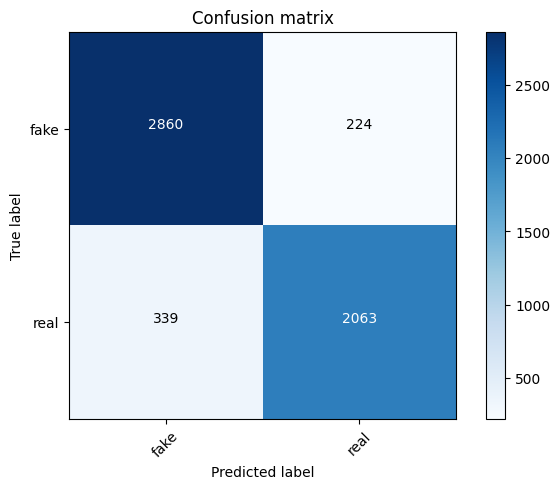

In [77]:
plot_confusion_matrix(cm,classes=['fake','real'])

In the above case, we did not use hyperparameter alpha for multinomialNB, now we can use hyperparameter alpha for that and then fine tune it 

In [82]:
classifier=MultinomialNB(alpha=0.1)

In [83]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/home/cham_si/anaconda3/envs/lrnconcept/lib/python3.9/site-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/home/cham_si/anaconda3/envs/lrnconcept/lib/python3.9/site-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score : 0.8984688297484505
Alpha: 0.1, Score : 0.8979219832300401
Alpha: 0.2, Score : 0.8975574188844331
Alpha: 0.30000000000000004, Score : 0.8975574188844331
Alpha: 0.4, Score : 0.8973751367116296
Alpha: 0.5, Score : 0.8973751367116296
Alpha: 0.6000000000000001, Score : 0.8973751367116296
Alpha: 0.7000000000000001, Score : 0.8973751367116296
Alpha: 0.8, Score : 0.8973751367116296
Alpha: 0.9, Score : 0.8973751367116296


change alpha between 0 to 1-- possible range. change the values from 0.1 to 1 and then fit the values and check if the accuracy score is improving

get feature names -- just by looking at the vector, how to determine which is a fake word and which one is a real word


In [84]:
feature_names = cv.get_feature_names_out()
feature_names

array(['aaron', 'abandon', 'abc', ..., 'zionist', 'zone', 'zu'],
      dtype=object)

In [87]:
## coefficients of the values 
classifier.feature_log_prob_[0]

array([ -9.77803312,  -9.02880641,  -9.09837176, ..., -11.49350001,
        -8.93983693, -14.34511878])

In [90]:
list(zip(classifier.feature_log_prob_[0], cv.get_feature_names_out()))

[(-9.778033115109707, 'aaron'),
 (-9.028806408800058, 'abandon'),
 (-9.098371758857784, 'abc'),
 (-10.017854056613205, 'abe'),
 (-10.03185008634053, 'abedin'),
 (-8.403701770500275, 'abil'),
 (-7.718122231152165, 'abl'),
 (-8.560646038439593, 'abort'),
 (-9.188183092271991, 'abroad'),
 (-9.851762641828639, 'absenc'),
 (-8.921096625884735, 'absolut'),
 (-9.997220587326694, 'absorb'),
 (-10.488274729028952, 'absurd'),
 (-9.679200145187735, 'abu'),
 (-8.383164356442204, 'abus'),
 (-9.31399310500537, 'academ'),
 (-9.010875600529666, 'academi'),
 (-9.709368345556031, 'acceler'),
 (-8.04975568137477, 'accept'),
 (-8.0200997870413, 'access'),
 (-11.524366660715728, 'access pipelin'),
 (-9.31399310500537, 'accid'),
 (-9.805751075834737, 'accommod'),
 (-9.422835478363844, 'accompani'),
 (-9.370565275335327, 'accomplish'),
 (-6.608604860175921, 'accord'),
 (-9.931364010767538, 'accord report'),
 (-7.396676256751668, 'account'),
 (-10.631546717629824, 'accumul'),
 (-9.684165398685638, 'accur'),
 

most negative value - most fake 
less negative value - most real

In [91]:
sorted(zip(classifier.feature_log_prob_[0], cv.get_feature_names_out()))

[(-15.092333186164353, 'auf'),
 (-15.092333186164353, 'en el'),
 (-15.092333186164353, 'fli zone'),
 (-15.092333186164353, 'html'),
 (-15.092333186164353, 'http co'),
 (-15.092333186164353, 'http www'),
 (-15.092333186164353, 'infowar life'),
 (-15.092333186164353, 'pic twitter com'),
 (-15.092333186164353, 'ufo'),
 (-15.092333186164353, 'utm'),
 (-14.345118784334131, 'brain forc'),
 (-14.345118784334131, 'como'),
 (-14.345118784334131, 'ein'),
 (-14.345118784334131, 'infowar com'),
 (-14.345118784334131, 'ist'),
 (-14.345118784334131, 'oligarchi'),
 (-14.345118784334131, 'twitter com'),
 (-14.345118784334131, 'una'),
 (-14.345118784334131, 'zu'),
 (-13.922261933514099, 'kadzik'),
 (-13.625996117370926, 'creamer'),
 (-13.625996117370926, 'rule class'),
 (-13.625996117370926, 'share articl'),
 (-13.625996117370926, 'und'),
 (-13.397737465389945, 'gold silver'),
 (-13.397737465389945, 'neo'),
 (-13.397737465389945, 'neocon'),
 (-13.397737465389945, 'por'),
 (-13.397737465389945, 'widget'

In [92]:
sorted(zip(classifier.feature_log_prob_[0], cv.get_feature_names_out()))[:20]

[(-15.092333186164353, 'auf'),
 (-15.092333186164353, 'en el'),
 (-15.092333186164353, 'fli zone'),
 (-15.092333186164353, 'html'),
 (-15.092333186164353, 'http co'),
 (-15.092333186164353, 'http www'),
 (-15.092333186164353, 'infowar life'),
 (-15.092333186164353, 'pic twitter com'),
 (-15.092333186164353, 'ufo'),
 (-15.092333186164353, 'utm'),
 (-14.345118784334131, 'brain forc'),
 (-14.345118784334131, 'como'),
 (-14.345118784334131, 'ein'),
 (-14.345118784334131, 'infowar com'),
 (-14.345118784334131, 'ist'),
 (-14.345118784334131, 'oligarchi'),
 (-14.345118784334131, 'twitter com'),
 (-14.345118784334131, 'una'),
 (-14.345118784334131, 'zu'),
 (-13.922261933514099, 'kadzik')]

top most fake words

In [93]:
sorted(zip(classifier.feature_log_prob_[0], cv.get_feature_names_out()),reverse=True)[:20]

[(-4.1815590658667166, 'mr'),
 (-4.214959176141447, 'said'),
 (-4.847429290064763, 'trump'),
 (-5.26861661896236, 'state'),
 (-5.274167529504229, 'one'),
 (-5.313848419069814, 'would'),
 (-5.377728669924025, 'year'),
 (-5.447551597843489, 'peopl'),
 (-5.462632106073206, 'new'),
 (-5.4854638106937905, 'like'),
 (-5.502119055746915, 'presid'),
 (-5.524093065074066, 'time'),
 (-5.613247244226972, 'mr trump'),
 (-5.687440799734196, 'also'),
 (-5.8255179672601916, 'say'),
 (-5.902773920038392, 'ms'),
 (-5.9317784736987065, 'american'),
 (-5.946720982937343, 'work'),
 (-5.952904191497753, 'could'),
 (-5.955292566031389, 'go')]

when we use reverse is true we get the most real words

Passive aggressive algorithm -- works on text data very well



In [78]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

In [79]:
linear_clf.fit(X_train,y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print(score)

0.9363835216915786


In [80]:
cm = metrics.confusion_matrix(y_test,pred)
cm

array([[2890,  194],
       [ 155, 2247]])

Confusion matrix, without normalization


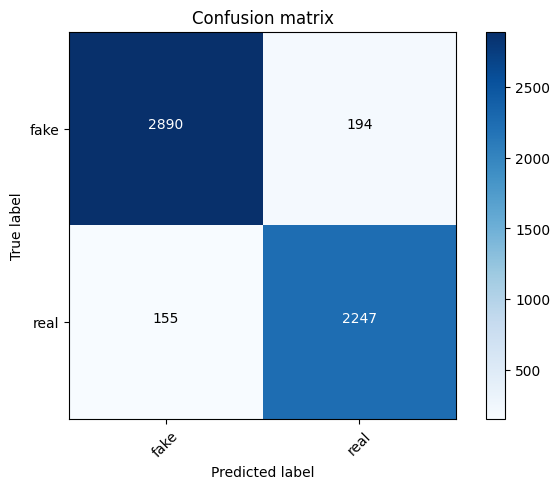

In [81]:
plot_confusion_matrix(cm,classes=['fake','real'])

Term frequency (tf) - number of times a word occurs in a document
f(t,d) -- frequency (term, document)

Inverse document frequency (idf) -- number of documents that contain the word

tf-idf measure = tf . Idf = prd(term freq * idf)

uncommon words in a document - higher tf-idf
more common words - almost zero tf-idf

In [94]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

Instead countvectorizer - we can use tfidf vectorizer like above-- we follow similar steps

In [95]:
X.shape

(18285, 5000)

In [96]:
tfidf_v.get_feature_names_out()[:20]

array(['aaron', 'abandon', 'abc', 'abe', 'abedin', 'abil', 'abl', 'abort',
       'abroad', 'absenc', 'absolut', 'absorb', 'absurd', 'abu', 'abus',
       'academ', 'academi', 'acceler', 'accept', 'access'], dtype=object)

In [97]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [99]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names_out())
count_df

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


similar to the vector matrix above

we apply MultiNomialNB algorithm

In [100]:
classifier=MultinomialNB()

In [101]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print(score)

0.8973751367116296


Confusion matrix, without normalization


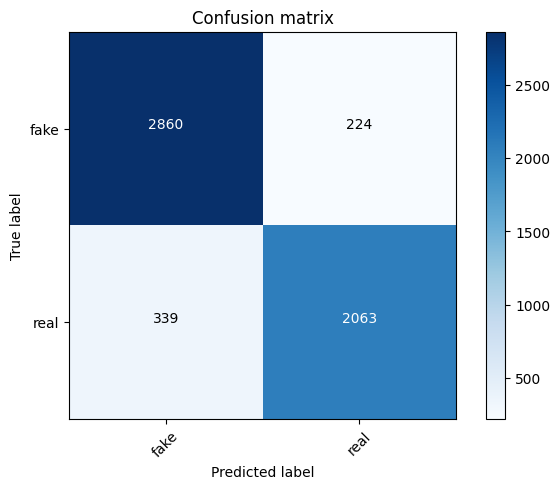

In [102]:
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['fake','real'])

Hashing Vectorizer: https://kavita-ganesan.com/hashingvectorizer-vs-countvectorizer/#.ZB6qGYDMJH4

1. The issue with counts and frequencies above is that the vocabulary can become very large
2. work around is to use a one way hash of words to convert them to integers


HashingVectorizer and CountVectorizer are meant to do the same thing. Which is to convert a collection of text documents to a matrix of token occurrences. The difference is that HashingVectorizer does not store the resulting vocabulary (i.e. the unique tokens).

By not having to store the vocabulary, the resulting HashingVectorizer object when saved, would be much smaller and thus faster to load back into memory when needed.

The downside of doing this is that it will not be possible to retrieve the actual token given the column position. This would be especially important in tasks like keyword extraction, where you want to retrieve and use the actual tokens.


In [104]:
hs_vectorizer=HashingVectorizer(n_features=5000,decode_error = 'ignore')
X=hs_vectorizer.fit_transform(corpus).toarray()

In [105]:
X.shape

(18285, 5000)

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [107]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [109]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
classifier=MultinomialNB()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)

In [110]:
print(score)

0.563711681855841


Confusion matrix, without normalization


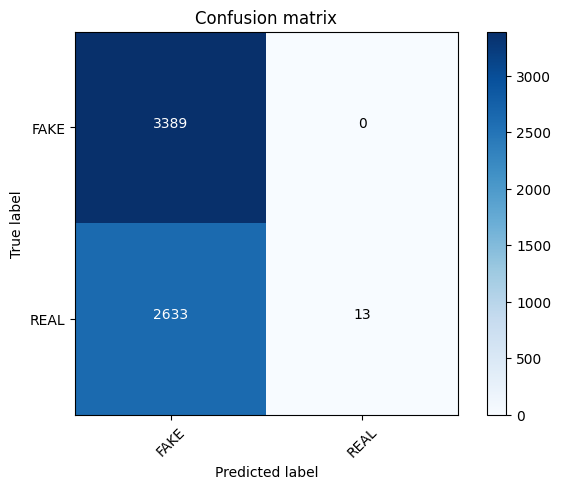

In [111]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Cosine similarity - to compare two documents - innerproduct / magnitudes product

Method of normalizing the document length during comparison 

Values between 0 and 1 -- more similar - cos 0 =1 

cosine similarity of tf-idf values are given as input to cosine similarity



References

https://www.youtube.com/watch?v=MO5n5JaRotc

https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/

https://www.kaggle.com/general/217499
